**Célula 1**: Configuração e extração de MFCCs

In [1]:
import os
import numpy as np
import librosa

# Hiperparâmetros da rede neural
num_epochs = 10
batch_size = 32
num_filters = 32
num_dense_units = 64

# Hiperparâmetros do SGDClassifier
random_state = 50

# Função para extrair MFCCs de um áudio
def extract_mfcc(audio_path, n_mfcc=13, max_length=200):

    """
      Extrai coeficiente MFCC de um arquivo de áudio.

      Args:
          audio_path (str): O caminho para o arquivo de áudio.
          n_mfcc (int): O número de coeficientes MFCC a serem extraídos.
          max_length (int): O comprimento máximo desejado dos coeficientes MFCC.
      Returns:
          numpy.ndarray: Uma matriz de coeficientes MFCC.
    """

    # Carrega o arquivo de áudio usando a biblioteca librosa
    audio, sr = librosa.load(audio_path, sr=None)

    # Calcula os coeficientes MFCC
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)

    # Padronize ou trunque os MFCCs para o tamanho máximo
    if mfccs.shape[1] < max_length:
        mfccs = librosa.util.fix_length(mfccs, max_length)
    else:
        mfccs = mfccs[:, :max_length]

    return mfccs


help(extract_mfcc)

Help on function extract_mfcc in module __main__:

extract_mfcc(audio_path, n_mfcc=13, max_length=200)
    Extrai coeficiente MFCC de um arquivo de áudio.
    
    Args:
        audio_path (str): O caminho para o arquivo de áudio.
        n_mfcc (int): O número de coeficientes MFCC a serem extraídos.
        max_length (int): O comprimento máximo desejado dos coeficientes MFCC.
    Returns:
        numpy.ndarray: Uma matriz de coeficientes MFCC.



**Célula 2**: Carregamento e pré-processamento dos dados

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Função para carregar e pré-processar os dados
def load_and_preprocess_data(data_dir, label_dict, n_mfcc=13):
    """
    Carrega e pré-processa os dados de áudio de um diretório.

    Parâmetros:
    - data_dir (str): O diretório raiz onde os dados de áudio estão armazenados.
    - label_dict (dict): Um dicionário que mapeia rótulos de classe para números inteiros.
    - n_mfcc (int, opcional): O número de coeficientes MFCC (Mel-frequency cepstral coefficients) a serem extraídos. O valor padrão é 13.

    Retorna:
    - data (numpy.ndarray): Um array NumPy contendo os coeficientes MFCC pré-processados dos dados de áudio.
    - labels (numpy.ndarray): Um array NumPy contendo os rótulos correspondentes às amostras de áudio.

    Descrição:
    Esta função carrega dados de áudio de um diretório e pré-processa-os para serem usados em tarefas de classificação. Para cada rótulo de classe no dicionário `label_dict`, a função percorre os arquivos de áudio correspondentes no diretório `data_dir` e extrai os coeficientes MFCC desses arquivos. Os coeficientes MFCC representam características de áudio importantes para tarefas de processamento de áudio. Os coeficientes e rótulos são armazenados em arrays NumPy e retornados como `data` e `labels`.

    Exemplo de uso:
    ```python
    label_dict = {"classe_1": 0, "classe_2": 1}
    data_dir = "/caminho/para/seus/dados"
    data, labels = load_and_preprocess_data(data_dir, label_dict, n_mfcc=13)
    ```
    """
    data = []
    labels = []

    for label, index in label_dict.items():
        audio_paths = os.listdir(os.path.join(data_dir, label))
        for audio_path in audio_paths:
            mfccs = extract_mfcc(os.path.join(data_dir, label, audio_path), n_mfcc=n_mfcc)
            data.append(mfccs)
            labels.append(index)

    data = np.array(data)
    labels = np.array(labels)

    return data, labels

help(load_and_preprocess_data)


Help on function load_and_preprocess_data in module __main__:

load_and_preprocess_data(data_dir, label_dict, n_mfcc=13)
    Carrega e pré-processa os dados de áudio de um diretório.
    
    Parâmetros:
    - data_dir (str): O diretório raiz onde os dados de áudio estão armazenados.
    - label_dict (dict): Um dicionário que mapeia rótulos de classe para números inteiros.
    - n_mfcc (int, opcional): O número de coeficientes MFCC (Mel-frequency cepstral coefficients) a serem extraídos. O valor padrão é 13.
    
    Retorna:
    - data (numpy.ndarray): Um array NumPy contendo os coeficientes MFCC pré-processados dos dados de áudio.
    - labels (numpy.ndarray): Um array NumPy contendo os rótulos correspondentes às amostras de áudio.
    
    Descrição:
    Esta função carrega dados de áudio de um diretório e pré-processa-os para serem usados em tarefas de classificação. Para cada rótulo de classe no dicionário `label_dict`, a função percorre os arquivos de áudio correspondentes no dir

**Célula 3**: Configurações iniciais

In [3]:
# Importe a biblioteca Google Colab Drive e monte o seu Google Drive.
from google.colab import drive
drive.mount('/content/drive/')

# Diretório onde seus dados estão organizados.
data_dir = '/content/drive/My Drive/Audios4'

# Dicionário de rótulos de classe (Naturais e Desmatamento).
label_dict = {
    'Naturais': 0,       # Rótulo da classe "Naturais" mapeado para o índice 0.
    'Nao naturais': 1    # Rótulo da classe "Desmatamento" mapeado para o índice 1.
}

# Número de classes no seu conjunto de dados.
num_classes = len(label_dict)

# Número de coeficientes MFCC.
n_mfcc = 13  # Defina o número desejado de coeficientes MFCC.

Mounted at /content/drive/


**Célula 4:** Carregamento, pré-processamento e divisão dos dados

In [13]:
# Carregamento e pré-processamento dos dados
data, labels = load_and_preprocess_data(data_dir, label_dict, n_mfcc=n_mfcc)

# Divisão em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


**Célula 5**: Definição do modelo CNN e treinamento

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Definição do modelo Convolutional Neural Network (CNN).

# Cria um modelo sequencial, que é uma pilha linear de camadas.
model = keras.Sequential([
    layers.Input(shape=(n_mfcc, 200, 1)),  # Especifica a forma da entrada, ajuste o tamanho máximo de acordo com o conjunto de dados.

    # Camada de convolução com 32 filtros de 3x3, função de ativação ReLU.
    layers.Conv2D(32, (3, 3), activation='relu'),

    # Camada de max pooling para redução espacial.
    layers.MaxPooling2D((2, 2)),

    # Camada de achatamento (flatten) para converter os mapas de características 2D em um vetor 1D.
    layers.Flatten(),

    # Camada densa (totalmente conectada) com 64 neurônios e função de ativação ReLU.
    layers.Dense(64, activation='relu'),

    # Camada densa de saída com um neurônio por classe e função de ativação softmax.
    layers.Dense(num_classes, activation='softmax')
])

# Compilação do modelo.

# Configura o otimizador 'adam', a função de perda 'sparse_categorical_crossentropy' para classificação multiclasse
# e a métrica 'accuracy' para avaliação.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Exibe um resumo do modelo, mostrando as camadas e o número de parâmetros.
model.summary()

# Treinamento do modelo.

# Treina o modelo com os dados de treinamento (X_train) e rótulos de treinamento (y_train) por 10 épocas,
# usando os dados de validação (X_test, y_test) para avaliação.
model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 11, 198, 32)       320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 99, 32)         0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 15840)             0         
                                                                 
 dense_4 (Dense)             (None, 64)                1013824   
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                                 
Total params: 1014274 (3.87 MB)
Trainable params: 1014274 (3.87 MB)
Non-trainable params: 0 (0.00 Byte)
________________

**Avaliação do Modelo**

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Treinamento do modelo
# model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size)

# Avaliação do modelo
y_pred = model.predict(X_test)

# Use 'argmax' para obter os rótulos binários das probabilidades de previsão.
y_pred_labels = np.argmax(y_pred, axis=1)

# Calcular a matriz de confusão
confusion = confusion_matrix(y_test, y_pred_labels)
print("Matriz de Confusão:")
print(confusion)

# Calcular a precisão
accuracy = accuracy_score(y_test, y_pred_labels)
print(f"Acurácia: {accuracy:.2f}")

# Calcular a sensibilidade (recall)
sensitivity = recall_score(y_test, y_pred_labels)
print(f"Sensibilidade: {sensitivity:.2f}")

# Calcular a pontuação F1
f1 = f1_score(y_test, y_pred_labels)
print(f"Pontuação F1: {f1:.2f}")

#""" matriz de confusão, a acurácia, a sensibilidade (recall) e a pontuação F1 """


2/2 [==============================] - 0s 10ms/step
Matriz de Confusão:
[[22  1]
 [ 2 15]]
Acurácia: 0.93
Sensibilidade: 0.88
Pontuação F1: 0.91


**Equilíbrio de Classes**

*   Oversampling
*   Undersampling


In [16]:
from imblearn.over_sampling import RandomOverSampler

# Achate os coeficientes MFCCs para 2 dimensões
X_train_flattened = X_train.reshape(X_train.shape[0], -1)

# Crie um objeto RandomOverSampler
ros = RandomOverSampler(random_state=None)

# Aplique o oversampling aos dados de treinamento achatados
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_flattened, y_train)


**Visualizações e Gráficos**

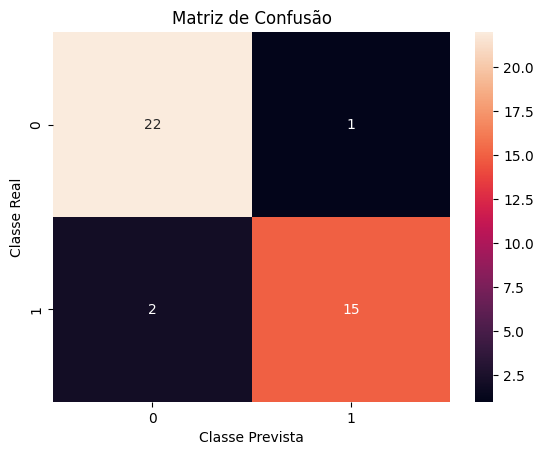

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plotar a matriz de confusão
sns.heatmap(confusion, annot=True, fmt='d')
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()


**Visualizações e Gráficos [Matriz de confusão | ROC]**

2/2 [==============================] - 0s 12ms/step


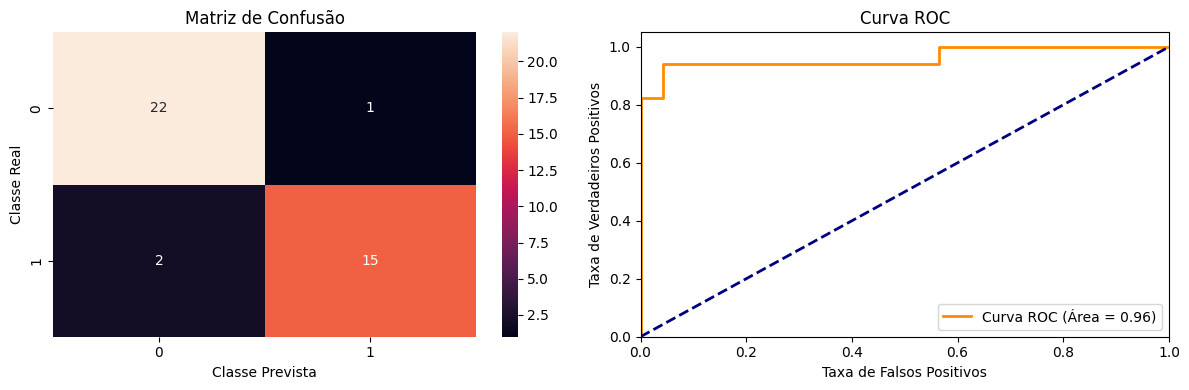

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

y_prob = model.predict(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

confusion = confusion_matrix(y_test, np.argmax(model.predict(X_test), axis=-1))

# Plotar a matriz de confusão
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(confusion, annot=True, fmt='d')
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')

# Plotar a curva ROC
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (Área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

**Célula 6**: Avaliação e previsão com o modelo CNN

In [19]:
# Avaliação do modelo.

# Calcula a perda e a precisão do modelo com base nos dados de teste (X_test, y_test).
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# Caminho do novo arquivo de áudio a ser classificado.
# new_audio_path = '/content/drive/My Drive/Audios4/Teste/1-15689-A.wav'
new_audio_path = '/content/drive/My Drive/Audios4/Teste/Helicopitero.wav'

# Extração dos coeficientes MFCC do novo arquivo de áudio.
mfccs_new_audio = extract_mfcc(new_audio_path, n_mfcc=n_mfcc)

# Reformula os coeficientes MFCC para coincidir com o formato esperado pelo modelo.
mfccs_new_audio = mfccs_new_audio.reshape(1, n_mfcc, -1, 1)

# Realiza uma previsão usando o modelo treinado no novo arquivo de áudio.
prediction = model.predict(mfccs_new_audio)

# A 'prediction' agora contém as probabilidades de pertencer a cada classe.

# Use 'np.argmax(prediction)' para obter a classe com a maior probabilidade.
predicted_class = np.argmax(prediction)

# Com base na classe prevista, imprime o resultado.
if predicted_class == 0:
    print(f'Predicted class: NATURAIS')
elif predicted_class == 1:
    print(f'Predicted class: NAO NATURAL')


2/2 [==============================] - 0s 11ms/step - loss: 1.3258 - accuracy: 0.9250
Test accuracy: 0.925000011920929
1/1 [==============================] - 0s 93ms/step
Predicted class: NAO NATURAL


**Célula 7**: Treinamento do modelo adicional usando SGDClassifier

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, f1_score

# Treinamento de um modelo adicional usando SGDClassifier.

# Cria uma lista binária y_train_D, onde 1 indica a classe positiva (Desmatamento) e 0 a classe negativa (Naturais).
y_train_D = [key == 1 for key in y_train]

# Cria uma lista binária y_test_D com a mesma lógica para os dados de teste.
y_test_D = [key == 1 for key in y_test]

# Achatar os dados de MFCC para que possam ser usados pelo modelo.
X_train_flatten = X_train.reshape(X_train.shape[0], -1)

# Cria um classificador Stochastic Gradient Descent (SGD) com um gerador de números aleatórios fixo.
sgd_clf = SGDClassifier(random_state=50)

# Treina o modelo SGD com os dados de treinamento achatados e as classes binárias y_train_D.
sgd_clf.fit(X_train_flatten, y_train_D)

# Realiza uma previsão para o exemplo de teste no índice 'n' e imprime a classe verdadeira.
n = 13
digitoX = X_test[n].reshape(1, -1)
y_test[n]
sgd_clf.predict(digitoX)

# Calcula a pontuação de validação cruzada (cross-validation score) com base nos dados de treinamento e classes binárias.
# Retorna uma lista de pontuações de precisão para diferentes dobras (folds) de validação cruzada.
cross_val_score(sgd_clf, X_train_flatten, y_train_D, cv=3, scoring='accuracy')

# Este método nos retorna uma previsão de todo o conjunto de treino
# por um classificador que não conhece a parte do conjunto de treino
# que ele está prevendo.

# Realiza a validação cruzada para obter previsões para todo o conjunto de treinamento.
y_train_pred = cross_val_predict(sgd_clf, X_train_flatten, y_train_D, cv=3)

# Calcula a pontuação de precisão (precision) com base nas previsões e classes binárias verdadeiras.
# Precisão é dada pela equação TP / (TP + FP).
# Quer dizer, dentro das vezes que o método disse sim, a quantidade de vezes que ele acertou.
precision_score(y_train_D, y_train_pred)

# Calcula a pontuação F1 com base nas previsões e classes binárias verdadeiras.
# F1 é dada pela equação 2 / ((1 / precision) + (1 / recall)).
# Um balanceamento entre precisão (precision) e revocação (recall).
f1_score(y_train_D, y_train_pred)


0.7419354838709677